In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import (minimize, fmin) 

In [3]:
#Nelder-Mead optimization instant 1
def obj(x):
    return (3*x[0]**2 + 12*x[1]**2 + 10*x[0])**2 + (24*x[0]*x[1] + 4*x[1] + 3)**2  
 
x0 = np.array([-3.5, 0])
res = minimize(obj, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 68
         Function evaluations: 132


In [4]:
print(res.x)

[-3.33146026  0.03949705]


In [12]:
#Nelder-Mead optimization instant 2
K = [0, 0, 0, 0, 0, 0]
for k in range(0, 6):
    K[k] = 500 + 200*(5/3-k-1)**2
W = [0, 0, 0, 0, 0]
for w in range(0, 5):
    W[w] = 50*(w+1)

def obje(x):
    PE = 0
    PE += 1/2*K[0]*(np.sqrt((x[0]-0)**2+(x[5]-0)**2)-10)**2
    for i in range(1, 5):
        PE += 1/2*K[i]*(np.sqrt((x[i]-x[i-1])**2+(x[i+5]-x[i+4])**2)-10)**2
    PE += 1/2*K[5]*(np.sqrt((60-x[4])**2+(0-x[9])**2)-10)**2
    for j in range(0, 5):
        PE += W[j]*x[j+5]
        
    return PE
 
x0 = np.array([10, 21, 31, 42, 51, -4, -7, -9, -9, -6])#first 5 is X rest is Y
ref = fmin(obje, x0, xtol = 1e-2, maxfun = 10000, disp = True)

Optimization terminated successfully.
         Current function value: -4416.384105
         Iterations: 1071
         Function evaluations: 1498


In [13]:
print(ref[])

[10.35498789 21.08691513 31.68712572 42.08988973 51.77131188 -4.27959339
 -7.89691541 -9.85336231 -9.39331663 -6.01181359]


In [51]:
def sa(x):
    f = 0
    for i in range(0, 3):
        f += x[i]
    return f
print(sa(np.array([1,2,3])))

6


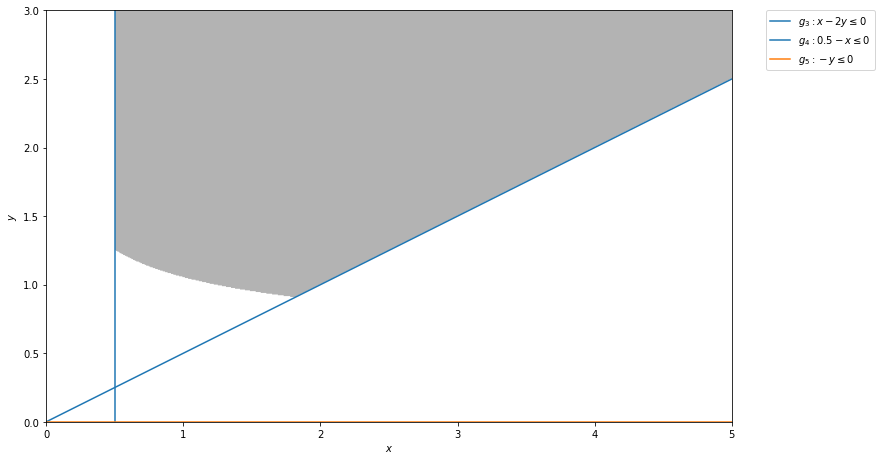

In [50]:
#polygon(LP)
d = np.linspace(-2,16,3000)
x,y = np.meshgrid(d,d)
plt.imshow( ((25/(x*y)+3000/(x*y**2)-2467.4126*y**2<=0) & (25/(x*y)+3000/(x*y**2)<=30000)  
             & (x-2*y<=0) & (0.5-x<=0) & (y>=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 16, 2000)

# y <= 0.3*x^2
y2 = 0.3*x**2
# 4y >= 2x - 8 
y3 = x/2
# y >= 0
y5 = (x*0) 

# Make plot
#plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$g_3:x-2y\leq0$')
plt.axvline(x=0.5, label=r'$g_4:0.5-x\leq0$')
plt.plot(x, y5, label=r'$g_5:-y\leq0$')

plt.xlim(0,5)
plt.ylim(0,3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()